In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# import sys
# sys._enablelegacywindowsfsencoding()


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# df =pd.read_hdf(r'C:\Users\Lee\Desktop\bib\data/diningcode.h5')
df = pd.read_hdf('./diningcode.h5', 'Detail')

# Load Data

In [5]:
# store = pd.HDFStore(path)
# store.keys()
# df = store['/Detail']

# Preprocessing

In [6]:
df_pre = df.copy()
df_pre = df_pre.reset_index(drop=True)

# 한글만 추출.
df_pre['Name_pre'] = df_pre['Name'].map(lambda x:re.sub('[^가-힣]','',x))
# df_pre['Name_pre'] = df_pre['Name'].map(lambda x:re.sub(r' ','',x))

# 지역명 구 단위로 분리
df_pre['Location_pre'] = df_pre['Location'].apply(lambda x : x.split(" ")[1])

# 점수컬럼, 숫자만 남기기
df_pre['Total Score_pre']= df_pre['Total Score'].apply(lambda x:x[:2])
df_pre['Score_pre'] = df_pre['Score'].apply(lambda x:x[:3])


df_pre['Like Count']= df_pre['Like Count'].astype('int64')
df_pre['Total Score_pre']=df_pre['Total Score_pre'].astype('int64')

In [7]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2473 non-null   object
 1   Name               2473 non-null   object
 2   Types              2473 non-null   object
 3   Like Count         2473 non-null   int64 
 4   Location           2473 non-null   object
 5   Tags               2473 non-null   object
 6   Total Review       2473 non-null   int64 
 7   Total Score        2473 non-null   object
 8   Score              2473 non-null   object
 9   Detail Score       2473 non-null   object
 10  Detail Score List  2473 non-null   object
 11  Date List          2473 non-null   object
 12  Total Score List   2473 non-null   object
 13  Review List        2473 non-null   object
 14  Review Rec List    2473 non-null   object
 15  Name_pre           2473 non-null   object
 16  Location_pre       2473 non-null   object


In [8]:
df_pre.isna().sum()

ID                   0
Name                 0
Types                0
Like Count           0
Location             0
Tags                 0
Total Review         0
Total Score          0
Score                0
Detail Score         0
Detail Score List    0
Date List            0
Total Score List     0
Review List          0
Review Rec List      0
Name_pre             0
Location_pre         0
Total Score_pre      0
Score_pre            0
dtype: int64

In [9]:
# df_pre['Name_pre'] = df_pre['Name'].map(lambda x:re.sub(r' ','',x))

In [10]:
# 공백 제거 확인
# df_pre[df_pre['Name_pre'].str.contains(".")].head()

# 각 년도별 빕 구르망 데이터 프레임 만들기

In [11]:
bib_list_23 = ['원디그리노스','정면','필레터','개성만두궁','게방식당','광화문국밥','교다이야','교양식사',
               '구복만두','금돼지식당','꽃밥에피다','꿉당','남포면옥','대성집','마포옥','만두집','만족오향족발','멘텐','명동교자',
               '미미면가','미진','베이스이즈나이스','봉산옥','봉피양','부촌육회','삼청동수제비','소이연남마오','스바루',
              '안씨막걸리','야키토리묵','양양메밀막국수','에그앤플라워','역전회관','오레노라멘','옥동식',
              '용금옥','우래옥','우육면관','유림면','임병주산동칼국수','자하손만두본점','정육면체','정인면옥',
              '진미평양냉면','진진','툭툭누들타이','팀호완','팩피','피양콩할마니','필동면옥','하동관','할매집','합정옥',
              '현우동','화해당','황금콩밭','황생가칼국수']



bib_list_22 =['꿉당','멘텐','에그앤플라워','팀호완','개성만두궁','게방식당','광화문국밥','교다이야','교양식사','구복만두',
             '금돼지식당','금산제면소','꽃밥에피다','남포면옥','대성집','마포옥','만두집','만족오향족발','명동교자',
             '미나미','미미면가','미진','백년옥','베이스이즈나이스','봉산옥','봉피양','부촌육회','삼청동수제비','세미계',
             '소이연남마오','스바루','안씨막걸리','야키토리묵','양양메밀막국수','역전회관','오레노라멘','오장동함흥냉면',
             '옥동식','용금옥','우래옥','우육면관','유림면','이문설렁탕','임병주산동칼국수','자하손만두본점','정육면체',
             '정인면옥','진미평양냉면','진진','충무로쭈꾸미불고기','툭툭누들타이','팩피','피양콩할마니','필동면옥',
             '하동관','할매집','합정옥','현우동','화해당','황금콩밭','황생가칼국수']


bib_list_21 = ['베이스이즈나이스','안씨막걸리','야키토리묵','우육면관','개성만두궁','게방식당','광화문국밥','교다이야',
              '교양식사','구복만두','금돼지식당','금산제면소','꽃밥에피다','남포면옥','대성집','마포옥','만두집',
              '만족오향족발','명동교자','미나미','미미면가','미진','백년옥','봉산옥','봉피양','부촌육회','산동교자관','삼청동수제비',
              '세미계','소이연남마오','스바루','양양메밀막국수','어메이징타이','역전회관','오레노라멘','오장동함흥냉면',
              '옥동식','용금옥','우래옥','유림면','이나니와요스케','이문설렁탕','일호식','임병주산동칼국수','자하손만두본점',
              '정육면체','정인면옥','진미평양냉면','진진','충무로쭈꾸미불고기','툭툭누들타이','팩피','피양콩할마니','필동면옥',
             '하동관','할매집','합정옥','현우동','황금콩밭','황생가칼국수']

bib_list_20 =['소이연남마오','어메이징타이','정육면체','현우동','개성만두궁',
             '게방식당','광화문국밥','교다이야','교양식사','구복만두',
              '금돼지식당','금산제면소','꽃밥에피다','남포면옥','대성집',
              '마포옥','만두집','만족오향족발','명동교자','목천집',
              '미나미','미미면가','미진','백년옥','봉산옥','봉피양','부촌육회','산동교자관','삼청동수제비',
              '세미계','스바루','양양메밀막국수','역전회관','오레노라멘',
              '오장동함흥냉면','오통영', '옥동식','용금옥','우래옥',
              '우육미엔','유림면','이나니와요스케','이문설렁탕','일호식',
              '임병주산동칼국수','자하손만두본점','정인면옥','진미평양냉면','진진',
              '충무로쭈꾸미불고기','툭툭누들타이','팩피','피양콩할마니','필동면옥',
             '하동관','한일관','할매집','합정옥','황금콩밭',
              '황생가칼국수'
             ] 

In [12]:
# 자하손만두는 bib_list 에서 바꿈.
add_bib_list =['하동관코엑스점','하동관여의도직영호점','하동관명동본점',
               '우육면관청계천점','우육면관광화문점',
               '봉산옥서초동본점',
               '광화문미진',
               '우래옥본점',
               '역전회관마포점',
               '미미면가호점',
               '명동교자이태원점','명동교자본점','명동교자분점',
               '부촌육회별관',
              ]

In [13]:
# 수정된 add_bib_list 추가

bib_list_23 = bib_list_23 + add_bib_list
bib_list_22 = bib_list_22 + add_bib_list
bib_list_21 = bib_list_21 + add_bib_list
bib_list_20 = bib_list_20 + add_bib_list




In [14]:
len(bib_list_23)

71

In [15]:
# in_sert ='미진'

# df[df['Name'].str.contains(in_sert)]
# df_pre[df_pre['Name_pre'].str.contains(in_sert)]

## 23년도

In [16]:
bib_list_23_df = pd.DataFrame(columns=(df_pre.columns))
for i in range(len(bib_list_23)):
    for j in range(len(df_pre)):
        try :
            if(bib_list_23[i]==df_pre['Name_pre'][j]):
                bib_list_23_df = bib_list_23_df.append(df_pre.iloc[[j]],ignore_index=True)
        except:
             print('err')
bib_list_23_df

C:\Users\user\AppData\Local\Temp\ipykernel_5300\2455484471.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bib_list_23_df = bib_list_23_df.append(df_pre.iloc[[j]],ignore_index=True)


,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,l0id7CmcvjwY,광화문국밥,"[돼지국밥, 평양냉면]",196,서울특별시 중구 정동 1-48,"[다코숨은맛집, 혼밥, 서민적인, 점심식사, 저녁식사, 바테이블, 무료주차]",33,74점,4.2점,"[맛4.6, 가격4.0, 서비스3.9]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...","[2022년 8월 17일, 2022년 6월 21일, 2022년 8월 2일, 2022...","[4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, ...",[2022.08.17저녁이 되어 배가 허~하여 국밥없나 하다가검색해보고 왔네요시끌벅...,"[공감(3), 공감(12), 공감(2), 공감(5), 공감(3), 공감(2), 공감...",광화문국밥,중구,74,4.2
1,5vxS7Z67ylcR,구복만두,"[만두, 새우만두]",416,서울특별시 용산구 갈월동 59-13,"[생활의달인, 수요미식회, 밥블레스유, 혼밥, 서민적인, 점심식사, 저녁식...",65,75점,4.0점,"[맛4.4, 가격4.4, 서비스4.1]","[맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...","[2022년 9월 25일, 2022년 10월 9일, 2022년 7월 25일, 202...","[2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[일요일 낮12 30분에갔어요좀기다렸어요먹다보니 사람들빠지더라 1시즘엔기다림없이들와...,"[공감(1), 공감(3), 공감(2), 공감(1), 공감(4), 공감(8), 공감(...",구복만두,용산구,75,4.0
2,fgn1s1W6QaPw,금돼지식당,"[삼겹살, 꽃목살]",372,서울특별시 중구 신당동 370-69,"[다코숨은맛집, 최자로드, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 연탄불]",58,85점,4.3점,"[맛4.8, 가격3.5, 서비스4.5]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...","[2022년 9월 12일, 2022년 4월 3일, 2022년 1월 4일, 2022년...","[5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[한번쯤은 가보고 싶었던 맛집!토요일 오후 4시쯤가서 한시간 반 웨이팅 하고 들어갔...,"[공감(3), 공감(3), 공감(2), 공감(6), 공감(8), 공감(1), 공감(...",금돼지식당,중구,85,4.3
3,beWMfHOv3QKO,꿉당,"[삼겹살, 목살]",39,서울특별시 서초구 잠원동 12-21,"[술모임, 캐주얼한, 저녁식사]",12,61점,4.0점,"[맛4.6, 가격2.9, 서비스4.3]","[맛5 가격3 서비스5, 맛5 가격5 서비스5, 맛3 가격3 서비스5, 맛5 가격3...","[2022년 4월 3일, 2021년 11월 14일, 2020년 9월 4일, 2019...","[4.0, 5.0, 3.0, 5.0, 5.0, 4.0, 3.0, 5.0, 4.0, ...","[유명 블로거가 오픈한 돼지고깃집으로, 이제는 미슐랭 가이드에도 이름을 올린 집을 ...","[공감(5), 공감(1), 공감(1), 공감(2), 공감(1), 공감(1), 공감(...",꿉당,서초구,61,4.0
4,qpxxC2UiEFYc,대성집,"[도가니탕, 도가니수육]",242,서울특별시 종로구 행촌동 209-35,"[다코숨은맛집, 빕구르망, 혼밥, 서민적인, 아침식사, 점심식사, 저녁식사...",22,69점,4.2점,"[맛4.9, 가격3.6, 서비스3.6]","[맛5 가격3 서비스5, 맛3 가격1 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 8월 27일, 2021년 12월 13일, 2021년 11월 26일, 2...","[5.0, 3.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",[여긴 이유있는 맛집이었네. 유명한 맛집이라고 하면 으레 조금 더 깐깐하게 평가하게...,"[공감(2), 공감(3), 공감(3), 공감(8), 공감(16), 공감(2), 공감...",대성집,종로구,69,4.2
5,1HEG1P9MbL5i,만족오향족발,"[족발, 오향족발]",532,서울특별시 중구 태평로2가 318-1,"[식신로드, vj특공대, 술모임, 시끌벅적한, 점심식사, 저녁식사, 칸막이...",60,76점,4.2점,"[맛4.7, 가격3.8, 서비스4.0]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5...","[2021년 9월 24일, 2022년 7월 7일, 2022년 2월 3일, 2022년...","[5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, ...",[오향가득한 만족스러운 족발 맛집이다.언제든 친구와 함께 소주한잔 곁들일 수 있는 ...,"[공감(10), 공감(3), 공감(2), 공감(2), 공감(5), 공감(2), 공감...",만족오향족발,중구,76,4.2
6,rRRsbE0iRntJ,멘텐,"[라멘, 소유라멘]",55,서울특별시 중구 충무로2가 12-3,"[혼밥, 조용한, 점심식사, 저녁식사, 바테이블]",16,69점,4.4점,"[맛4.7, 가격4.0, 서비스3.7]","[맛5 가격5 서비스5, 맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격5...","[2022년 3월 7일, 2022년 2월 9일, 2022년 6월 8일, 2022년 ...","[5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",[미슐랭인데 맛도 좋아서 웨이팅 깁니다. 사장님께서 장사를 느긋하게 하셔서 기본 3...,"[공감(5), 공감(3), 공감(2), 공감(2), 공감(5), 공감(8), 공감(...",멘텐,중구,69,4.4
7,RgMp7smrE6d7,봉피양,"[평양냉면, 한우양곰탕]",26,서울특별시 양천구 신월동 1003-3,"[가족외식, 고급스러운, 점심식사, 좌식, 무료주차]",4,47점,4.2점,"[맛5.0, 가격2.2, 서비스5.0]","[맛5 가격3 서비스5, 맛5 가격1 서비스5, nan, nan]","[2019년 9월 3일, 2020년 6월 16일, 2016년 12월 28일, 201...","[4.0, 4.0, 5.0, 5.0]",[-깔끔하고 친절함-평양냉면 을밀대보다 나음-주차 6대밖에 안됨-만두 개당2천원으로...,"[공감(2), 공감(1), 공감(0), 공감(0)]",봉피양,양천구,47,4.2
8,IPBKstNYfNW5,삼청동수제비,"[수제비, 감자전]",447,서울특별시 종로구 삼청동 99-2,"[무한도전맛집, 식사모임, 서민적인, 점심식사, 저녁식사, 무료주차]",64,63점,3.8점,"[맛4.5, 가격3.3, 서비스3.6]","[맛5 가격5 서비스5, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛5 가격3...","[2022년 10월 17일, 2022년 7월 29일, 2022년 7월 1일, 202...","[5.0, 4.0, 4.0, 4.0, 3.0, 5.0, 2.0, 3.0, 4.0, ...",[주말에 엄마 청와대 관람 바래다드리고 정오에 도착했는데 40분정도 기다린듯.요즘 ...,"[공감(1), 공감(23), 공감(2), 공감(4), 공감(2), 공감(5), 공감...",삼청동수제비,종로구,63,3.8
9,FZmA8yBg4Qfc,야키토리 묵,"[오마카세, 야키토리]",42,서울특별시 마포구 연남동 223-102,"[술모임, 조용한, 저녁식사, 예약필수, 콜키지, 바자리]",7,65점,4.7점,"[맛5.0, 가격4.0, 서비스4.7]","[맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛5 가격5 서비스5, 맛5 가격3...","[2021년 10월 20일

## 22년도

In [17]:
bib_list_22_df = pd.DataFrame(columns=(df_pre.columns))
for i in range(len(bib_list_22)):
    for j in range(len(df_pre)):
        try :
            if(bib_list_22[i]==df_pre['Name_pre'][j]):
                bib_list_22_df = bib_list_22_df.append(df_pre.iloc[[j]],ignore_index=True)
        except:
             print('err')
bib_list_22_df

C:\Users\user\AppData\Local\Temp\ipykernel_5300\560866237.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bib_list_22_df = bib_list_22_df.append(df_pre.iloc[[j]],ignore_index=True)


,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,beWMfHOv3QKO,꿉당,"[삼겹살, 목살]",39,서울특별시 서초구 잠원동 12-21,"[술모임, 캐주얼한, 저녁식사]",12,61점,4.0점,"[맛4.6, 가격2.9, 서비스4.3]","[맛5 가격3 서비스5, 맛5 가격5 서비스5, 맛3 가격3 서비스5, 맛5 가격3...","[2022년 4월 3일, 2021년 11월 14일, 2020년 9월 4일, 2019...","[4.0, 5.0, 3.0, 5.0, 5.0, 4.0, 3.0, 5.0, 4.0, ...","[유명 블로거가 오픈한 돼지고깃집으로, 이제는 미슐랭 가이드에도 이름을 올린 집을 ...","[공감(5), 공감(1), 공감(1), 공감(2), 공감(1), 공감(1), 공감(...",꿉당,서초구,61,4.0
1,rRRsbE0iRntJ,멘텐,"[라멘, 소유라멘]",55,서울특별시 중구 충무로2가 12-3,"[혼밥, 조용한, 점심식사, 저녁식사, 바테이블]",16,69점,4.4점,"[맛4.7, 가격4.0, 서비스3.7]","[맛5 가격5 서비스5, 맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격5...","[2022년 3월 7일, 2022년 2월 9일, 2022년 6월 8일, 2022년 ...","[5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",[미슐랭인데 맛도 좋아서 웨이팅 깁니다. 사장님께서 장사를 느긋하게 하셔서 기본 3...,"[공감(5), 공감(3), 공감(2), 공감(2), 공감(5), 공감(8), 공감(...",멘텐,중구,69,4.4
2,5haP644gdM71,팀호완,"[딤섬, 바오번]",81,서울특별시 강남구 삼성동 148-15,"[맛있는녀석들, 식사모임, 캐주얼한, 점심식사, 저녁식사, 발렛, 무료주차...",37,78점,4.1점,"[맛4.5, 가격4.1, 서비스3.8]","[맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛5 가격5 서비스5, 맛5 가격3...","[2022년 10월 20일, 2022년 7월 16일, 2022년 7월 9일, 202...","[3.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 5.0, 5.0, ...",[홍콩 침사추이 딤섬 본향의 맛을 느낄 수 있어요. 보기보다 크기는 엄청 작습니다(...,"[공감(4), 공감(5), 공감(6), 공감(6), 공감(5), 공감(15), 공감...",팀호완,강남구,78,4.1
3,l0id7CmcvjwY,광화문국밥,"[돼지국밥, 평양냉면]",196,서울특별시 중구 정동 1-48,"[다코숨은맛집, 혼밥, 서민적인, 점심식사, 저녁식사, 바테이블, 무료주차]",33,74점,4.2점,"[맛4.6, 가격4.0, 서비스3.9]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...","[2022년 8월 17일, 2022년 6월 21일, 2022년 8월 2일, 2022...","[4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, ...",[2022.08.17저녁이 되어 배가 허~하여 국밥없나 하다가검색해보고 왔네요시끌벅...,"[공감(3), 공감(12), 공감(2), 공감(5), 공감(3), 공감(2), 공감...",광화문국밥,중구,74,4.2
4,5vxS7Z67ylcR,구복만두,"[만두, 새우만두]",416,서울특별시 용산구 갈월동 59-13,"[생활의달인, 수요미식회, 밥블레스유, 혼밥, 서민적인, 점심식사, 저녁식...",65,75점,4.0점,"[맛4.4, 가격4.4, 서비스4.1]","[맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...","[2022년 9월 25일, 2022년 10월 9일, 2022년 7월 25일, 202...","[2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[일요일 낮12 30분에갔어요좀기다렸어요먹다보니 사람들빠지더라 1시즘엔기다림없이들와...,"[공감(1), 공감(3), 공감(2), 공감(1), 공감(4), 공감(8), 공감(...",구복만두,용산구,75,4.0
5,fgn1s1W6QaPw,금돼지식당,"[삼겹살, 꽃목살]",372,서울특별시 중구 신당동 370-69,"[다코숨은맛집, 최자로드, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 연탄불]",58,85점,4.3점,"[맛4.8, 가격3.5, 서비스4.5]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...","[2022년 9월 12일, 2022년 4월 3일, 2022년 1월 4일, 2022년...","[5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[한번쯤은 가보고 싶었던 맛집!토요일 오후 4시쯤가서 한시간 반 웨이팅 하고 들어갔...,"[공감(3), 공감(3), 공감(2), 공감(6), 공감(8), 공감(1), 공감(...",금돼지식당,중구,85,4.3
6,IqGjznzijBZL,금산제면소,"[국수, 탄탄멘]",94,서울특별시 중구 회현동2가 31-1,"[최자로드, 혼밥, 조용한, 점심식사, 저녁식사]",35,71점,4.1점,"[맛4.6, 가격3.2, 서비스3.8]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛3 가격3...","[2022년 3월 9일, 2022년 1월 4일, 2021년 6월 14일, 2021년...","[4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, ...","[마라베이스의 탄탄멘 식당메뉴는 탄탄멘 하나뿐이라서 고민이 필요없다대신 온천계란, ...","[공감(9), 공감(6), 공감(12), 공감(5), 공감(14), 공감(9), 공...",금산제면소,중구,71,4.1
7,qpxxC2UiEFYc,대성집,"[도가니탕, 도가니수육]",242,서울특별시 종로구 행촌동 209-35,"[다코숨은맛집, 빕구르망, 혼밥, 서민적인, 아침식사, 점심식사, 저녁식사...",22,69점,4.2점,"[맛4.9, 가격3.6, 서비스3.6]","[맛5 가격3 서비스5, 맛3 가격1 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 8월 27일, 2021년 12월 13일, 2021년 11월 26일, 2...","[5.0, 3.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",[여긴 이유있는 맛집이었네. 유명한 맛집이라고 하면 으레 조금 더 깐깐하게 평가하게...,"[공감(2), 공감(3), 공감(3), 공감(8), 공감(16), 공감(2), 공감...",대성집,종로구,69,4.2
8,1HEG1P9MbL5i,만족오향족발,"[족발, 오향족발]",532,서울특별시 중구 태평로2가 318-1,"[식신로드, vj특공대, 술모임, 시끌벅적한, 점심식사, 저녁식사, 칸막이...",60,76점,4.2점,"[맛4.7, 가격3.8, 서비스4.0]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5...","[2021년 9월 24일, 2022년 7월 7일, 2022년 2월 3일, 2022년...","[5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, ...",[오향가득한 만족스러운 족발 맛집이다.언제든 친구와 함께 소주한잔 곁들일 수 있는 ...,"[공감(10), 공감(3), 공감(2), 공감(2), 공감(5), 공감(2), 공감...",만족오향족발,중구,76,4.2
9,UYyqcBJV1Jhh,미나미,"[소바, 소바마끼]",390,서울특별시 서초구 서초동 1668-7,"[수요미식회, 미쉐린플레이트, 데이트, 이국적/이색적, 점심식사, 저녁식사,...",21,57점,3.7점,"[맛4.0, 가격2.3, 서비스3.

## 21년도

In [18]:
bib_list_21_df = pd.DataFrame(columns=(df_pre.columns))
for i in range(len(bib_list_21)):
    for j in range(len(df_pre)):
        try :
            if(bib_list_21[i]==df_pre['Name_pre'][j]):
                bib_list_21_df = bib_list_21_df.append(df_pre.iloc[[j]],ignore_index=True)
        except:
             print('err')
bib_list_21_df

C:\Users\user\AppData\Local\Temp\ipykernel_5300\2673966160.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bib_list_21_df = bib_list_21_df.append(df_pre.iloc[[j]],ignore_index=True)


,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,FZmA8yBg4Qfc,야키토리 묵,"[오마카세, 야키토리]",42,서울특별시 마포구 연남동 223-102,"[술모임, 조용한, 저녁식사, 예약필수, 콜키지, 바자리]",7,65점,4.7점,"[맛5.0, 가격4.0, 서비스4.7]","[맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛5 가격5 서비스5, 맛5 가격3...","[2021년 10월 20일, 2022년 3월 10일, 2021년 12월 17일, 2...","[5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0]",[구성이 너무 좋고 맛있는 야키토리 오마카세. 친절하시고 너무 만족스러운 식사였어요...,"[공감(0), 공감(3), 공감(0), 공감(3), 공감(6), 공감(2), 공감(0)]",야키토리묵,마포구,65,4.7
1,l0id7CmcvjwY,광화문국밥,"[돼지국밥, 평양냉면]",196,서울특별시 중구 정동 1-48,"[다코숨은맛집, 혼밥, 서민적인, 점심식사, 저녁식사, 바테이블, 무료주차]",33,74점,4.2점,"[맛4.6, 가격4.0, 서비스3.9]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...","[2022년 8월 17일, 2022년 6월 21일, 2022년 8월 2일, 2022...","[4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, ...",[2022.08.17저녁이 되어 배가 허~하여 국밥없나 하다가검색해보고 왔네요시끌벅...,"[공감(3), 공감(12), 공감(2), 공감(5), 공감(3), 공감(2), 공감...",광화문국밥,중구,74,4.2
2,5vxS7Z67ylcR,구복만두,"[만두, 새우만두]",416,서울특별시 용산구 갈월동 59-13,"[생활의달인, 수요미식회, 밥블레스유, 혼밥, 서민적인, 점심식사, 저녁식...",65,75점,4.0점,"[맛4.4, 가격4.4, 서비스4.1]","[맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...","[2022년 9월 25일, 2022년 10월 9일, 2022년 7월 25일, 202...","[2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[일요일 낮12 30분에갔어요좀기다렸어요먹다보니 사람들빠지더라 1시즘엔기다림없이들와...,"[공감(1), 공감(3), 공감(2), 공감(1), 공감(4), 공감(8), 공감(...",구복만두,용산구,75,4.0
3,fgn1s1W6QaPw,금돼지식당,"[삼겹살, 꽃목살]",372,서울특별시 중구 신당동 370-69,"[다코숨은맛집, 최자로드, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 연탄불]",58,85점,4.3점,"[맛4.8, 가격3.5, 서비스4.5]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...","[2022년 9월 12일, 2022년 4월 3일, 2022년 1월 4일, 2022년...","[5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[한번쯤은 가보고 싶었던 맛집!토요일 오후 4시쯤가서 한시간 반 웨이팅 하고 들어갔...,"[공감(3), 공감(3), 공감(2), 공감(6), 공감(8), 공감(1), 공감(...",금돼지식당,중구,85,4.3
4,IqGjznzijBZL,금산제면소,"[국수, 탄탄멘]",94,서울특별시 중구 회현동2가 31-1,"[최자로드, 혼밥, 조용한, 점심식사, 저녁식사]",35,71점,4.1점,"[맛4.6, 가격3.2, 서비스3.8]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛3 가격3...","[2022년 3월 9일, 2022년 1월 4일, 2021년 6월 14일, 2021년...","[4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, ...","[마라베이스의 탄탄멘 식당메뉴는 탄탄멘 하나뿐이라서 고민이 필요없다대신 온천계란, ...","[공감(9), 공감(6), 공감(12), 공감(5), 공감(14), 공감(9), 공...",금산제면소,중구,71,4.1
5,qpxxC2UiEFYc,대성집,"[도가니탕, 도가니수육]",242,서울특별시 종로구 행촌동 209-35,"[다코숨은맛집, 빕구르망, 혼밥, 서민적인, 아침식사, 점심식사, 저녁식사...",22,69점,4.2점,"[맛4.9, 가격3.6, 서비스3.6]","[맛5 가격3 서비스5, 맛3 가격1 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 8월 27일, 2021년 12월 13일, 2021년 11월 26일, 2...","[5.0, 3.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",[여긴 이유있는 맛집이었네. 유명한 맛집이라고 하면 으레 조금 더 깐깐하게 평가하게...,"[공감(2), 공감(3), 공감(3), 공감(8), 공감(16), 공감(2), 공감...",대성집,종로구,69,4.2
6,1HEG1P9MbL5i,만족오향족발,"[족발, 오향족발]",532,서울특별시 중구 태평로2가 318-1,"[식신로드, vj특공대, 술모임, 시끌벅적한, 점심식사, 저녁식사, 칸막이...",60,76점,4.2점,"[맛4.7, 가격3.8, 서비스4.0]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5...","[2021년 9월 24일, 2022년 7월 7일, 2022년 2월 3일, 2022년...","[5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, ...",[오향가득한 만족스러운 족발 맛집이다.언제든 친구와 함께 소주한잔 곁들일 수 있는 ...,"[공감(10), 공감(3), 공감(2), 공감(2), 공감(5), 공감(2), 공감...",만족오향족발,중구,76,4.2
7,UYyqcBJV1Jhh,미나미,"[소바, 소바마끼]",390,서울특별시 서초구 서초동 1668-7,"[수요미식회, 미쉐린플레이트, 데이트, 이국적/이색적, 점심식사, 저녁식사,...",21,57점,3.7점,"[맛4.0, 가격2.3, 서비스3.1]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격1...","[2022년 6월 1일, 2022년 8월 5일, 2021년 3월 9일, 2020년 ...","[5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, ...",[서초동 교대역 인근의 소바 전문점. 색다른 소바가 많고 맛있음. 가격이 좀 있는데...,"[공감(1), 공감(4), 공감(4), 공감(9), 공감(2), 공감(0), 공감(...",미나미,서초구,57,3.7
8,RgMp7smrE6d7,봉피양,"[평양냉면, 한우양곰탕]",26,서울특별시 양천구 신월동 1003-3,"[가족외식, 고급스러운, 점심식사, 좌식, 무료주차]",4,47점,4.2점,"[맛5.0, 가격2.2, 서비스5.0]","[맛5 가격3 서비스5, 맛5 가격1 서비스5, nan, nan]","[2019년 9월 3일, 2020년 6월 16일, 2016년 12월 28일, 201...","[4.0, 4.0, 5.0, 5.0]",[-깔끔하고 친절함-평양냉면 을밀대보다 나음-주차 6대밖에 안됨-만두 개당2천원으로...,"[공감(2), 공감(1), 공감(0), 공감(0)]",봉피양,양천구,47,4.2
9,IPBKstNYfNW5,삼청동수제비,"[수제비, 감자전]",447,서울특별시 종로구 삼청동 99-2,"[무한도전맛집, 식사모임, 서민적인, 점심식사, 저녁식사, 무료주차]",64,63점,3.8점,"[맛4.5, 가격3.3, 서비스3.6]","[맛5 가격5 서비스5, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛5 

## 20년도

In [19]:
bib_list_20_df = pd.DataFrame(columns=(df_pre.columns))
for i in range(len(bib_list_20)):
    for j in range(len(df_pre)):
        try :
            if(bib_list_20[i]==df_pre['Name_pre'][j]):
                bib_list_20_df = bib_list_20_df.append(df_pre.iloc[[j]],ignore_index=True)
        except:
             print('err')
                
bib_list_20_df

C:\Users\user\AppData\Local\Temp\ipykernel_5300\3692877857.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bib_list_20_df = bib_list_20_df.append(df_pre.iloc[[j]],ignore_index=True)


,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,Sk8QtkTpwB4x,어메이징타이,[태국음식],58,서울특별시 용산구 한남동 683-134,"[다코숨은맛집, 식사모임, 이국적/이색적, 점심식사, 저녁식사]",8,59점,4.4점,"[맛5.0, 가격4.5, 서비스4.4]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 5월 8일, 2022년 2월 10일, 2021년 3월 25일, 2021...","[5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0]",[태국음식을 전문으로 만드는 만큼 다양한 종류의 음식들을 많이 팔아요.둘다 처음 먹...,"[공감(2), 공감(3), 공감(5), 공감(4), 공감(2), 공감(2), 공감(...",어메이징타이,용산구,59,4.4
1,wpME7Qe0FIyx,정육면체,"[아시아음식, 유린기]",41,서울특별시 서대문구 창천동 62-18,"[혼밥, 캐주얼한, 점심식사, 저녁식사, 제로페이]",26,62점,4.1점,"[맛4.2, 가격4.3, 서비스4.3]","[맛3 가격3 서비스5, 맛5 가격3 서비스3, 맛3 가격3 서비스3, 맛5 가격5...","[2022년 5월 11일, 2021년 12월 30일, 2022년 3월 16일, 20...","[3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 5.0, 4.0, 3.0, ...",[땅콩이 전체적으로 베이스로 들어가있고고소한 거 좋아하시는 분들은 좋아할 것 같은데...,"[공감(4), 공감(15), 공감(5), 공감(2), 공감(1), 공감(2), 공감...",정육면체,서대문구,62,4.1
2,l0id7CmcvjwY,광화문국밥,"[돼지국밥, 평양냉면]",196,서울특별시 중구 정동 1-48,"[다코숨은맛집, 혼밥, 서민적인, 점심식사, 저녁식사, 바테이블, 무료주차]",33,74점,4.2점,"[맛4.6, 가격4.0, 서비스3.9]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...","[2022년 8월 17일, 2022년 6월 21일, 2022년 8월 2일, 2022...","[4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, ...",[2022.08.17저녁이 되어 배가 허~하여 국밥없나 하다가검색해보고 왔네요시끌벅...,"[공감(3), 공감(12), 공감(2), 공감(5), 공감(3), 공감(2), 공감...",광화문국밥,중구,74,4.2
3,5vxS7Z67ylcR,구복만두,"[만두, 새우만두]",416,서울특별시 용산구 갈월동 59-13,"[생활의달인, 수요미식회, 밥블레스유, 혼밥, 서민적인, 점심식사, 저녁식...",65,75점,4.0점,"[맛4.4, 가격4.4, 서비스4.1]","[맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...","[2022년 9월 25일, 2022년 10월 9일, 2022년 7월 25일, 202...","[2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[일요일 낮12 30분에갔어요좀기다렸어요먹다보니 사람들빠지더라 1시즘엔기다림없이들와...,"[공감(1), 공감(3), 공감(2), 공감(1), 공감(4), 공감(8), 공감(...",구복만두,용산구,75,4.0
4,fgn1s1W6QaPw,금돼지식당,"[삼겹살, 꽃목살]",372,서울특별시 중구 신당동 370-69,"[다코숨은맛집, 최자로드, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 연탄불]",58,85점,4.3점,"[맛4.8, 가격3.5, 서비스4.5]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...","[2022년 9월 12일, 2022년 4월 3일, 2022년 1월 4일, 2022년...","[5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[한번쯤은 가보고 싶었던 맛집!토요일 오후 4시쯤가서 한시간 반 웨이팅 하고 들어갔...,"[공감(3), 공감(3), 공감(2), 공감(6), 공감(8), 공감(1), 공감(...",금돼지식당,중구,85,4.3
5,IqGjznzijBZL,금산제면소,"[국수, 탄탄멘]",94,서울특별시 중구 회현동2가 31-1,"[최자로드, 혼밥, 조용한, 점심식사, 저녁식사]",35,71점,4.1점,"[맛4.6, 가격3.2, 서비스3.8]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛3 가격3...","[2022년 3월 9일, 2022년 1월 4일, 2021년 6월 14일, 2021년...","[4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, ...","[마라베이스의 탄탄멘 식당메뉴는 탄탄멘 하나뿐이라서 고민이 필요없다대신 온천계란, ...","[공감(9), 공감(6), 공감(12), 공감(5), 공감(14), 공감(9), 공...",금산제면소,중구,71,4.1
6,qpxxC2UiEFYc,대성집,"[도가니탕, 도가니수육]",242,서울특별시 종로구 행촌동 209-35,"[다코숨은맛집, 빕구르망, 혼밥, 서민적인, 아침식사, 점심식사, 저녁식사...",22,69점,4.2점,"[맛4.9, 가격3.6, 서비스3.6]","[맛5 가격3 서비스5, 맛3 가격1 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 8월 27일, 2021년 12월 13일, 2021년 11월 26일, 2...","[5.0, 3.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",[여긴 이유있는 맛집이었네. 유명한 맛집이라고 하면 으레 조금 더 깐깐하게 평가하게...,"[공감(2), 공감(3), 공감(3), 공감(8), 공감(16), 공감(2), 공감...",대성집,종로구,69,4.2
7,1HEG1P9MbL5i,만족오향족발,"[족발, 오향족발]",532,서울특별시 중구 태평로2가 318-1,"[식신로드, vj특공대, 술모임, 시끌벅적한, 점심식사, 저녁식사, 칸막이...",60,76점,4.2점,"[맛4.7, 가격3.8, 서비스4.0]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5...","[2021년 9월 24일, 2022년 7월 7일, 2022년 2월 3일, 2022년...","[5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, ...",[오향가득한 만족스러운 족발 맛집이다.언제든 친구와 함께 소주한잔 곁들일 수 있는 ...,"[공감(10), 공감(3), 공감(2), 공감(2), 공감(5), 공감(2), 공감...",만족오향족발,중구,76,4.2
8,UYyqcBJV1Jhh,미나미,"[소바, 소바마끼]",390,서울특별시 서초구 서초동 1668-7,"[수요미식회, 미쉐린플레이트, 데이트, 이국적/이색적, 점심식사, 저녁식사,...",21,57점,3.7점,"[맛4.0, 가격2.3, 서비스3.1]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격1...","[2022년 6월 1일, 2022년 8월 5일, 2021년 3월 9일, 2020년 ...","[5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, ...",[서초동 교대역 인근의 소바 전문점. 색다른 소바가 많고 맛있음. 가격이 좀 있는데...,"[공감(1), 공감(4), 공감(4), 공감(9), 공감(2), 공감(0), 공감(...",미나미,서초구,57,3.7
9,RgMp7smrE6d7,봉피양,"[평양냉면, 한우양곰탕]",26,서울특별시 양천구 신월동 1003-3,"[가족외식, 고급스러운, 점심식사, 좌식, 무료주차]",4,47점,4.2점,"[맛5.0, 가격2

In [20]:
# 크롤링한 데이터에서 , 빕 구르망에 실린 식당 리스트 추출한 갯수
print(len(bib_list_20_df))
print(len(bib_list_21_df))
print(len(bib_list_22_df))
print(len(bib_list_23_df))

38
39
41
39


# like count 와 total score_pre 칼럼 결측치 0으로 채우기

In [21]:
# 0으로 채우기 or 결측치 삭제?
bib_list_20_df.fillna(0,inplace=True)
bib_list_21_df.fillna(0,inplace=True)
bib_list_22_df.fillna(0,inplace=True)
bib_list_23_df.fillna(0,inplace=True)

bib_list_20_df['Like Count']= bib_list_20_df['Like Count'].astype('int64')
bib_list_20_df['Total Score_pre']=bib_list_20_df['Total Score_pre'].astype('int64')

bib_list_21_df['Like Count']= bib_list_21_df['Like Count'].astype('int64')
bib_list_21_df['Total Score_pre']=bib_list_21_df['Total Score_pre'].astype('int64')

bib_list_22_df['Like Count']= bib_list_22_df['Like Count'].astype('int64')
bib_list_22_df['Total Score_pre']=bib_list_22_df['Total Score_pre'].astype('int64')

bib_list_23_df['Like Count']= bib_list_23_df['Like Count'].astype('int64')
bib_list_23_df['Total Score_pre']=bib_list_23_df['Total Score_pre'].astype('int64')

# 일반 식당과 빕 구르망 식당의 Total score 평균값 비교

Total score의 평균값 확인시 빕 구르망리스트에 있는 식당이 평균점수가 더 높음

In [22]:
print('****************************************************')

# temp = df_pre.sample(len(bib_list_20_df))
temp_m = np.mean(df_pre['Total Score_pre'])
temp_m20 = np.mean(bib_list_20_df['Total Score_pre'])

print('20년도 Total_score 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m20)

print('****************************************************')

temp = df_pre.sample(len(bib_list_21_df))
temp_m = np.mean(temp['Total Score_pre'])
temp_m21 = np.mean(bib_list_21_df['Total Score_pre'])

print('21년도 Total_score 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m21)

print('****************************************************')

temp = df_pre.sample(len(bib_list_22_df))
temp_m = np.mean(df_pre['Total Score_pre'])
temp_m22 = np.mean(bib_list_22_df['Total Score_pre'])

print('22년도 Total_score 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m22)

print('****************************************************')

temp = df_pre.sample(len(bib_list_23_df))
temp_m = np.mean(temp['Total Score_pre'])
temp_m23 = np.mean(bib_list_23_df['Total Score_pre'])

print('23년도 Total_score 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m23)
print('****************************************************')

print('데이터 전체 평균',np.mean(df_pre['Total Score_pre']))


****************************************************
20년도 Total_score 평균값 비교

일반 식당: 57.67610190052568
빕구르망 식당: 69.02631578947368
****************************************************
21년도 Total_score 평균값 비교

일반 식당: 56.743589743589745
빕구르망 식당: 68.92307692307692
****************************************************
22년도 Total_score 평균값 비교

일반 식당: 57.67610190052568
빕구르망 식당: 69.1951219512195
****************************************************
23년도 Total_score 평균값 비교

일반 식당: 56.58974358974359
빕구르망 식당: 69.46153846153847
****************************************************
데이터 전체 평균 57.67610190052568


In [23]:
bib_list_23_df[bib_list_23_df['Total Score_pre']>70]

,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,l0id7CmcvjwY,광화문국밥,"[돼지국밥, 평양냉면]",196,서울특별시 중구 정동 1-48,"[다코숨은맛집, 혼밥, 서민적인, 점심식사, 저녁식사, 바테이블, 무료주차]",33,74점,4.2점,"[맛4.6, 가격4.0, 서비스3.9]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...","[2022년 8월 17일, 2022년 6월 21일, 2022년 8월 2일, 2022...","[4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, ...",[2022.08.17저녁이 되어 배가 허~하여 국밥없나 하다가검색해보고 왔네요시끌벅...,"[공감(3), 공감(12), 공감(2), 공감(5), 공감(3), 공감(2), 공감...",광화문국밥,중구,74,4.2
1,5vxS7Z67ylcR,구복만두,"[만두, 새우만두]",416,서울특별시 용산구 갈월동 59-13,"[생활의달인, 수요미식회, 밥블레스유, 혼밥, 서민적인, 점심식사, 저녁식...",65,75점,4.0점,"[맛4.4, 가격4.4, 서비스4.1]","[맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...","[2022년 9월 25일, 2022년 10월 9일, 2022년 7월 25일, 202...","[2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[일요일 낮12 30분에갔어요좀기다렸어요먹다보니 사람들빠지더라 1시즘엔기다림없이들와...,"[공감(1), 공감(3), 공감(2), 공감(1), 공감(4), 공감(8), 공감(...",구복만두,용산구,75,4.0
2,fgn1s1W6QaPw,금돼지식당,"[삼겹살, 꽃목살]",372,서울특별시 중구 신당동 370-69,"[다코숨은맛집, 최자로드, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 연탄불]",58,85점,4.3점,"[맛4.8, 가격3.5, 서비스4.5]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...","[2022년 9월 12일, 2022년 4월 3일, 2022년 1월 4일, 2022년...","[5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[한번쯤은 가보고 싶었던 맛집!토요일 오후 4시쯤가서 한시간 반 웨이팅 하고 들어갔...,"[공감(3), 공감(3), 공감(2), 공감(6), 공감(8), 공감(1), 공감(...",금돼지식당,중구,85,4.3
5,1HEG1P9MbL5i,만족오향족발,"[족발, 오향족발]",532,서울특별시 중구 태평로2가 318-1,"[식신로드, vj특공대, 술모임, 시끌벅적한, 점심식사, 저녁식사, 칸막이...",60,76점,4.2점,"[맛4.7, 가격3.8, 서비스4.0]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5...","[2021년 9월 24일, 2022년 7월 7일, 2022년 2월 3일, 2022년...","[5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, ...",[오향가득한 만족스러운 족발 맛집이다.언제든 친구와 함께 소주한잔 곁들일 수 있는 ...,"[공감(10), 공감(3), 공감(2), 공감(2), 공감(5), 공감(2), 공감...",만족오향족발,중구,76,4.2
10,wJpwvXzEFYVj,오레노라멘,"[시오라멘, 쇼유라멘]",449,서울특별시 마포구 합정동 361-1,"[다코숨은맛집, 혼밥, 캐주얼한, 점심식사, 저녁식사, 노키즈존]",68,93점,4.4점,"[맛4.7, 가격4.5, 서비스4.3]","[맛3 가격5 서비스5, 맛5 가격5 서비스3, 맛5 가격5 서비스5, 맛5 가격5...","[2022년 7월 28일, 2022년 5월 19일, 2022년 7월 25일, 202...","[3.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.0, ...",[합정에 있는 오레노 라멘 ☆이근처 라멘집중 평이 좋악봤네요맛은 짭짤하면서도 진한 ...,"[공감(1), 공감(4), 공감(3), 공감(8), 공감(1), 공감(13), 공감...",오레노라멘,마포구,93,4.4
11,4fgdW6Inktww,옥동식,"[돼지국밥, 돼지곰탕]",402,서울특별시 마포구 서교동 385-6,"[다코숨은맛집, 수요미식회, 빕구르망, 혼밥, 조용한, 점심식사, 저녁식사...",48,76점,4.3점,"[맛4.6, 가격3.8, 서비스4.5]","[맛5 가격3 서비스3, 맛3 가격1 서비스1, 맛5 가격3 서비스5, 맛5 가격3...","[2022년 3월 25일, 2022년 1월 29일, 2021년 10월 18일, 20...","[5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, ...","[매장이 넓지 않아 웬만하면 웨이팅이 있고, 대기 공간은 없습니다. 접객은 특별히 ...","[공감(3), 공감(2), 공감(2), 공감(8), 공감(4), 공감(6), 공감(...",옥동식,마포구,76,4.3
14,ksKEt3HtDLvz,자하손만두 본점,"[손만두, 만두국]",457,서울특별시 종로구 부암동 245-2,"[수요미식회, 식객허영만의백반기행, 맛있는녀석들, 가족외식, 깔끔한, 점심식...",51,74점,4.0점,"[맛4.3, 가격2.7, 서비스4.0]","[맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛3 가격3 서비스3, 맛5 가격1...","[2022년 2월 1일, 2022년 1월 25일, 2022년 8월 24일, 2021...","[5.0, 4.0, 4.0, 4.0, 5.0, 3.0, 4.0, 4.0, 5.0, ...",[서울 부암동 산꼭대기에 위치한만두 전문점 입니다. 자주가지는 못하지만 10년 넘게...,"[공감(2), 공감(2), 공감(3), 공감(2), 공감(5), 공감(4), 공감(...",자하손만두본점,종로구,74,4.0
16,LLxOoK0VOe2k,정인면옥,"[평양냉면, 물냉면]",389,서울특별시 영등포구 여의도동 13-1,"[생활의달인, 수요미식회, 식신로드, 맛있는녀석들, 식사모임, 깔끔한, 점...",67,71점,3.9점,"[맛4.4, 가격3.8, 서비스3.9]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 8월 22일, 2022년 7월 15일, 2022년 3월 3일, 2022...","[5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, ...",[평양냉면 미슐랭 맛집이라길래마침 근처에 왔다가 들렀습니다안에 들어있는 고기가 아주...,"[공감(1), 공감(2), 공감(4), 공감(9), 공감(10), 공감(3), 공감...",정인면옥,영등포구,71,3.9
17,VT9sxn0135MR,진미평양냉면,"[냉면, 어복쟁반]",411,서울특별시 강남구 논현동 115-10,"[다코숨은맛집, 수요미식회, 맛있는녀석들, 밥블레스유, 빕구르망, 식사모임...",71,85점,4.2점,"[맛4.6, 가격3.6, 서비스3.8]","[맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 7월 11일, 2022년 5월 11일, 2022년 4월 11일, 202...","[5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, ...",[먹었던 평양냉면 중 육수 1위압도적 맛제육 = 보쌈어느 보쌈 집 보다 맛있고 후회...,"[공감(2), 공감(4), 공감(11), 공감(6), 공감(3), 공감(1), 공감...",진미평양냉면,강남구,85,4.2
20,5haP644gdM71,팀호완,"[딤섬, 바오번]",81,서울특별시 강남구 삼성

In [24]:
df_pre[df_pre['Like Count']>300]

,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,PYk33Cv6jpwY,중앙해장,"[해장국, 곱창전골]",637,서울특별시 강남구 대치동 996-16,"[술모임, 시끌벅적한, 아침식사, 점심식사, 저녁식사, 무료주차]",93,91점,4.3점,"[맛4.8, 가격3.4, 서비스4.0]","[맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛5 가격3...","[2022년 5월 5일, 2022년 4월 8일, 2022년 2월 11일, 2021년...","[5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, ...","[맛보기 전까진 비싼듯 했으나, 맛을 보고 가격값 한다 생각한 곱창전골!일단 곱창이...","[공감(6), 공감(6), 공감(4), 공감(5), 공감(1), 공감(2), 공감(...",중앙해장,강남구,91,4.3
1,yJWYroWneBZz,농민백암순대 본점,"[순대국, 국밥]",510,서울특별시 강남구 대치동 896-37,"[수요미식회, 혼밥, 서민적인, 점심식사, 저녁식사, 주차]",64,86점,4.5점,"[맛4.8, 가격4.5, 서비스4.0]","[맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛5 가격5...","[2022년 9월 2일, 2022년 5월 22일, 2022년 5월 2일, 2022년...","[5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[#맛듣던대로 잡내없고 깔끔한 순대국밥두명이서 국밥과 순대를 다 맛보긴 조금 물렸음...,"[공감(3), 공감(3), 공감(9), 공감(4), 공감(8), 공감(4), 공감(...",농민백암순대본점,강남구,86,4.5
2,VT9sxn0135MR,진미평양냉면,"[냉면, 어복쟁반]",411,서울특별시 강남구 논현동 115-10,"[다코숨은맛집, 수요미식회, 맛있는녀석들, 밥블레스유, 빕구르망, 식사모임...",71,85점,4.2점,"[맛4.6, 가격3.6, 서비스3.8]","[맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 7월 11일, 2022년 5월 11일, 2022년 4월 11일, 202...","[5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, ...",[먹었던 평양냉면 중 육수 1위압도적 맛제육 = 보쌈어느 보쌈 집 보다 맛있고 후회...,"[공감(2), 공감(4), 공감(11), 공감(6), 공감(3), 공감(1), 공감...",진미평양냉면,강남구,85,4.2
3,Dw5rZ87WVOLS,리틀넥 청담,"[스테이크, 라자냐]",560,서울특별시 강남구 신사동 653-7,"[수요미식회, 데이트, 깔끔한, 점심식사, 저녁식사, 발렛, 발렛파킹, 배달]",55,85점,4.4점,"[맛4.8, 가격3.6, 서비스4.2]","[맛3 가격3 서비스5, 맛5 가격3 서비스3, 맛3 가격3 서비스5, 맛5 가격3...","[2022년 9월 15일, 2022년 6월 26일, 2022년 4월 29일, 202...","[3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 5.0, ...",[청담동(사실은 신사동)에 있는 인스타 올리기 위해 찾아 온다는 블로그 맛집을 찾아...,"[공감(3), 공감(3), 공감(4), 공감(3), 공감(6), 공감(4), 공감(...",리틀넥청담,강남구,85,4.4
5,HnGIlmCt6tYi,브루클린더버거조인트 가로수길점,"[수제버거, 치즈버거]",864,서울특별시 강남구 신사동 540-11,"[최자로드, 데이트, 이국적/이색적, 점심식사, 저녁식사, 24시간영업, ...",73,82점,4.4점,"[맛4.9, 가격3.4, 서비스4.2]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛5 가격5...","[2022년 9월 29일, 2022년 7월 23일, 2022년 7월 11일, 202...","[4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, ...",[브루클린 버거에 피클 빼고 감튀&음료 세트 추가해서 먹었어요! 식사는 만족하고 갑...,"[공감(2), 공감(0), 공감(2), 공감(3), 공감(2), 공감(11), 공감...",브루클린더버거조인트가로수길점,강남구,82,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,U4fdgy4Z4HDd,란주칼면,"[도삭면, 꿔바로우]",435,서울특별시 중구 충무로1가 25-14,"[다코숨은맛집, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 배달]",54,68점,3.9점,"[맛4.5, 가격4.0, 서비스3.3]","[맛3 가격3 서비스3, 맛3 가격3 서비스1, 맛5 가격5 서비스5, 맛5 가격5...","[2022년 9월 23일, 2022년 10월 14일, 2021년 12월 1일, 20...","[3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, ...",[솔직하게 짬뽕은 너무 맵고 별 맛이고추기름이 너무 많아 느끼하고 맵고 면에는 간이...,"[공감(2), 공감(1), 공감(0), 공감(0), 공감(1), 공감(3), 공감(...",란주칼면,중구,68,3.9
2331,Y0VHi4X4851U,중림장설렁탕,"[설렁탕, 도가니탕]",355,서울특별시 중구 중림동 468,"[백종원의3대천왕, 혼밥, 서민적인, 아침식사, 점심식사, 저녁식사]",26,64점,3.8점,"[맛4.1, 가격4.1, 서비스3.2]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛1 가격3...","[2022년 1월 30일, 2021년 7월 5일, 2020년 7월 4일, 2019년...","[3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, ...",[토렴식으로 밥 말아서 나와요 뜨끈한 거 좋아하는 사람은 싫을수도.김치 듬뿍 아주 ...,"[공감(4), 공감(3), 공감(5), 공감(0), 공감(2), 공감(2), 공감(...",중림장설렁탕,중구,64,3.8
2333,TIpdtqmPttT5,청키면가 무교점,"[중식당, 새우완탕면]",506,서울특별시 중구 다동 58-1,"[데이트, 이국적/이색적, 점심식사, 저녁식사, 배달]",20,64점,4.1점,"[맛4.4, 가격3.5, 서비스3.7]","[맛5 가격3 서비스5, 맛5 가격5 서비스5, 맛5 가격3 서비스3, 맛3 가격3...","[2021년 10월 13일, 2022년 9월 24일, 2021년 6월 25일, 20...","[4.0, 5.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, ...","[홍콩 현지맛과 가장 흡사한 완탕면이라고 방문했는데, 홍콩에 가본적이 없어서 비슷한...","[공감(19), 공감(0), 공감(11), 공감(3), 공감(1), 공감(0), 공...",청키면가무교점,중구,64,4.1
2339,Hb8688CMZCBd,하동관 명동본점,"[곰탕, 한우곰탕]",719,서울특별시 중구 명동1가 10-4,"[수요미식회, 혼밥, 시끌벅적한, 아침식사, 점심식사]",59,64점,3.8점,"[맛4.7, 가격2.5, 서비스2.7]","[맛5 가격3 서비스5, 맛5 가격1 서비스3, 맛3 가격1 서비스1, 맛3 가격1...","[2022년 10월 9일, 2022년 5월 31일, 2022년 8월 25일, 202...","[3.0, 4.0, 1.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, ...",[하동관 명동 본점에서 곰탕 한 그릇 했습니다~유명한 곳이라 평일 점심에도 손님이 ...,"[공감(6), 공감(2), 공감(3), 공감(3), 공감(5), 공감(9), 공감

# 일반 식당과 빕 구르망 식당의 좋아요 수 평균값 비교

In [25]:

print('****************************************************')

temp = df_pre.sample(len(bib_list_20_df))
temp_m = np.mean(temp['Like Count'])
temp_m20 = np.mean(bib_list_20_df['Like Count'])

print('20년도 좋아요수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m20)
print('****************************************************')


temp = df_pre.sample(len(bib_list_21_df))
temp_m = np.mean(temp['Like Count'])
temp_m21 = np.mean(bib_list_21_df['Like Count'])

print('21년도 좋아요수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m21)
print('****************************************************')
temp = df_pre.sample(len(bib_list_22_df))
temp_m = np.mean(temp['Like Count'])
temp_m22 = np.mean(bib_list_22_df['Like Count'])

print('22년도 좋아요수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m22)
print('****************************************************')
temp = df_pre.sample(len(bib_list_23_df))
temp_m = np.mean(temp['Like Count'])
temp_m23 = np.mean(bib_list_23_df['Like Count'])

print('23년도 좋아요수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m23)
print('****************************************************')

print('데이터 전체 평균',np.mean(df_pre['Like Count']))

****************************************************
20년도 좋아요수 평균값 비교

일반 식당: 55.421052631578945
빕구르망 식당: 383.7368421052632
****************************************************
21년도 좋아요수 평균값 비교

일반 식당: 77.17948717948718
빕구르망 식당: 374.97435897435895
****************************************************
22년도 좋아요수 평균값 비교

일반 식당: 97.70731707317073
빕구르망 식당: 359.5365853658537
****************************************************
23년도 좋아요수 평균값 비교

일반 식당: 145.6153846153846
빕구르망 식당: 365.56410256410254
****************************************************
데이터 전체 평균 79.8362312980186


# 일반 식당과 빕 구르망 식당의 리뷰 수 평균값 비교

In [26]:

print('****************************************************')

temp = df_pre.sample(len(bib_list_20_df))
temp_m = np.mean(temp['Total Review'])
temp_m20 = np.mean(bib_list_20_df['Total Review'])

print('20년도 리뷰수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m20)
print('****************************************************')


temp = df_pre.sample(len(bib_list_21_df))
temp_m = np.mean(temp['Total Review'])
temp_m21 = np.mean(bib_list_21_df['Total Review'])

print('21년도 리뷰수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m21)
print('****************************************************')
temp = df_pre.sample(len(bib_list_22_df))
temp_m = np.mean(temp['Total Review'])
temp_m22 = np.mean(bib_list_22_df['Total Review'])

print('22년도 리뷰수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m22)
print('****************************************************')
temp = df_pre.sample(len(bib_list_23_df))
temp_m = np.mean(temp['Total Review'])
temp_m23 = np.mean(bib_list_23_df['Total Review'])

print('23년도 리뷰수 평균값 비교\n')
print('일반 식당:',temp_m)
print('빕구르망 식당:',temp_m23)
print('****************************************************')

print('데이터 전체 평균',np.mean(df_pre['Total Review']))

****************************************************
20년도 리뷰수 평균값 비교

일반 식당: 10.026315789473685
빕구르망 식당: 51.3421052631579
****************************************************
21년도 리뷰수 평균값 비교

일반 식당: 9.461538461538462
빕구르망 식당: 50.205128205128204
****************************************************
22년도 리뷰수 평균값 비교

일반 식당: 10.609756097560975
빕구르망 식당: 49.146341463414636
****************************************************
23년도 리뷰수 평균값 비교

일반 식당: 15.564102564102564
빕구르망 식당: 50.23076923076923
****************************************************
데이터 전체 평균 13.006874241811564


In [27]:
bib_list_20_df

,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List,Name_pre,Location_pre,Total Score_pre,Score_pre
0,Sk8QtkTpwB4x,어메이징타이,[태국음식],58,서울특별시 용산구 한남동 683-134,"[다코숨은맛집, 식사모임, 이국적/이색적, 점심식사, 저녁식사]",8,59점,4.4점,"[맛5.0, 가격4.5, 서비스4.4]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 5월 8일, 2022년 2월 10일, 2021년 3월 25일, 2021...","[5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0]",[태국음식을 전문으로 만드는 만큼 다양한 종류의 음식들을 많이 팔아요.둘다 처음 먹...,"[공감(2), 공감(3), 공감(5), 공감(4), 공감(2), 공감(2), 공감(...",어메이징타이,용산구,59,4.4
1,wpME7Qe0FIyx,정육면체,"[아시아음식, 유린기]",41,서울특별시 서대문구 창천동 62-18,"[혼밥, 캐주얼한, 점심식사, 저녁식사, 제로페이]",26,62점,4.1점,"[맛4.2, 가격4.3, 서비스4.3]","[맛3 가격3 서비스5, 맛5 가격3 서비스3, 맛3 가격3 서비스3, 맛5 가격5...","[2022년 5월 11일, 2021년 12월 30일, 2022년 3월 16일, 20...","[3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 5.0, 4.0, 3.0, ...",[땅콩이 전체적으로 베이스로 들어가있고고소한 거 좋아하시는 분들은 좋아할 것 같은데...,"[공감(4), 공감(15), 공감(5), 공감(2), 공감(1), 공감(2), 공감...",정육면체,서대문구,62,4.1
2,l0id7CmcvjwY,광화문국밥,"[돼지국밥, 평양냉면]",196,서울특별시 중구 정동 1-48,"[다코숨은맛집, 혼밥, 서민적인, 점심식사, 저녁식사, 바테이블, 무료주차]",33,74점,4.2점,"[맛4.6, 가격4.0, 서비스3.9]","[맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...","[2022년 8월 17일, 2022년 6월 21일, 2022년 8월 2일, 2022...","[4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 5.0, ...",[2022.08.17저녁이 되어 배가 허~하여 국밥없나 하다가검색해보고 왔네요시끌벅...,"[공감(3), 공감(12), 공감(2), 공감(5), 공감(3), 공감(2), 공감...",광화문국밥,중구,74,4.2
3,5vxS7Z67ylcR,구복만두,"[만두, 새우만두]",416,서울특별시 용산구 갈월동 59-13,"[생활의달인, 수요미식회, 밥블레스유, 혼밥, 서민적인, 점심식사, 저녁식...",65,75점,4.0점,"[맛4.4, 가격4.4, 서비스4.1]","[맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...","[2022년 9월 25일, 2022년 10월 9일, 2022년 7월 25일, 202...","[2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[일요일 낮12 30분에갔어요좀기다렸어요먹다보니 사람들빠지더라 1시즘엔기다림없이들와...,"[공감(1), 공감(3), 공감(2), 공감(1), 공감(4), 공감(8), 공감(...",구복만두,용산구,75,4.0
4,fgn1s1W6QaPw,금돼지식당,"[삼겹살, 꽃목살]",372,서울특별시 중구 신당동 370-69,"[다코숨은맛집, 최자로드, 식사모임, 시끌벅적한, 점심식사, 저녁식사, 연탄불]",58,85점,4.3점,"[맛4.8, 가격3.5, 서비스4.5]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...","[2022년 9월 12일, 2022년 4월 3일, 2022년 1월 4일, 2022년...","[5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[한번쯤은 가보고 싶었던 맛집!토요일 오후 4시쯤가서 한시간 반 웨이팅 하고 들어갔...,"[공감(3), 공감(3), 공감(2), 공감(6), 공감(8), 공감(1), 공감(...",금돼지식당,중구,85,4.3
5,IqGjznzijBZL,금산제면소,"[국수, 탄탄멘]",94,서울특별시 중구 회현동2가 31-1,"[최자로드, 혼밥, 조용한, 점심식사, 저녁식사]",35,71점,4.1점,"[맛4.6, 가격3.2, 서비스3.8]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛3 가격3...","[2022년 3월 9일, 2022년 1월 4일, 2021년 6월 14일, 2021년...","[4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, ...","[마라베이스의 탄탄멘 식당메뉴는 탄탄멘 하나뿐이라서 고민이 필요없다대신 온천계란, ...","[공감(9), 공감(6), 공감(12), 공감(5), 공감(14), 공감(9), 공...",금산제면소,중구,71,4.1
6,qpxxC2UiEFYc,대성집,"[도가니탕, 도가니수육]",242,서울특별시 종로구 행촌동 209-35,"[다코숨은맛집, 빕구르망, 혼밥, 서민적인, 아침식사, 점심식사, 저녁식사...",22,69점,4.2점,"[맛4.9, 가격3.6, 서비스3.6]","[맛5 가격3 서비스5, 맛3 가격1 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 8월 27일, 2021년 12월 13일, 2021년 11월 26일, 2...","[5.0, 3.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",[여긴 이유있는 맛집이었네. 유명한 맛집이라고 하면 으레 조금 더 깐깐하게 평가하게...,"[공감(2), 공감(3), 공감(3), 공감(8), 공감(16), 공감(2), 공감...",대성집,종로구,69,4.2
7,1HEG1P9MbL5i,만족오향족발,"[족발, 오향족발]",532,서울특별시 중구 태평로2가 318-1,"[식신로드, vj특공대, 술모임, 시끌벅적한, 점심식사, 저녁식사, 칸막이...",60,76점,4.2점,"[맛4.7, 가격3.8, 서비스4.0]","[맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격5...","[2021년 9월 24일, 2022년 7월 7일, 2022년 2월 3일, 2022년...","[5.0, 5.0, 3.0, 5.0, 4.0, 4.0, 4.0, 3.0, 5.0, ...",[오향가득한 만족스러운 족발 맛집이다.언제든 친구와 함께 소주한잔 곁들일 수 있는 ...,"[공감(10), 공감(3), 공감(2), 공감(2), 공감(5), 공감(2), 공감...",만족오향족발,중구,76,4.2
8,UYyqcBJV1Jhh,미나미,"[소바, 소바마끼]",390,서울특별시 서초구 서초동 1668-7,"[수요미식회, 미쉐린플레이트, 데이트, 이국적/이색적, 점심식사, 저녁식사,...",21,57점,3.7점,"[맛4.0, 가격2.3, 서비스3.1]","[맛5 가격3 서비스5, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격1...","[2022년 6월 1일, 2022년 8월 5일, 2021년 3월 9일, 2020년 ...","[5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, ...",[서초동 교대역 인근의 소바 전문점. 색다른 소바가 많고 맛있음. 가격이 좀 있는데...,"[공감(1), 공감(4), 공감(4), 공감(9), 공감(2), 공감(0), 공감(...",미나미,서초구,57,3.7
9,RgMp7smrE6d7,봉피양,"[평양냉면, 한우양곰탕]",26,서울특별시 양천구 신월동 1003-3,"[가족외식, 고급스러운, 점심식사, 좌식, 무료주차]",4,47점,4.2점,"[맛5.0, 가격2

In [28]:
bib_list_20_df['Detail Score'].head()
bib_list_20_df['Detail Score List'].head()
bib_list_20_df['Detail Score List'].head()

0    [맛5 가격5 서비스3, 맛5 가격3 서비스5, 맛5 가격5 서비스3, 맛5 가격5...
1    [맛3 가격3 서비스5, 맛5 가격3 서비스3, 맛3 가격3 서비스3, 맛5 가격5...
2    [맛5 가격5 서비스3, 맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛3 가격3...
3    [맛1 가격3 서비스3, 맛3 가격5 서비스5, 맛5 가격3 서비스3, 맛1 가격3...
4    [맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛1 가격3 서비스5, 맛5 가격3...
Name: Detail Score List, dtype: object

# 빕 구르망리스트에 있는 가게, 왜 안뽑혔는지 파악

In [29]:
name = df_pre['Name_pre'].tolist()

# 차집합.
not_exists_23 = list(set(bib_list_23) - set(name))

not_exists_22 = list(set(bib_list_22) - set(name))

not_exists_21 = list(set(bib_list_21) - set(name))

not_exists_20 = list(set(bib_list_20) - set(name))

In [30]:
not_exists_23
not_exists_22
not_exists_21
not_exists_20

['한일관',
 '양양메밀막국수',
 '게방식당',
 '봉산옥',
 '만두집',
 '스바루',
 '이나니와요스케',
 '하동관',
 '목천집',
 '세미계',
 '일호식',
 '교다이야',
 '소이연남마오',
 '교양식사',
 '합정옥',
 '미미면가',
 '이문설렁탕',
 '남포면옥',
 '산동교자관',
 '용금옥',
 '부촌육회',
 '역전회관',
 '우래옥',
 '할매집',
 '오통영',
 '개성만두궁',
 '현우동',
 '백년옥',
 '황금콩밭',
 '미진',
 '명동교자',
 '충무로쭈꾸미불고기',
 '오장동함흥냉면',
 '꽃밥에피다',
 '우육미엔',
 '마포옥']

In [31]:
text_20 = bib_list_20_df.iloc[[8]]['Review List'].tolist()

In [32]:
text_20

[['서초동 교대역 인근의 소바 전문점. 색다른 소바가 많고 맛있음. 가격이 좀 있는데 그만한 값어치를 한다고 생각함. 식당 규모는 크지 않음',
  '국물이 맛있었고 튀김이 맛있었네요 청어는 조금 느끼해요',
  '소바랑 생맥주의 조합이 정말 맛있었어요!여러가지 메뉴를 먹어보았는데,청어소바 or 우니소바 + 소바마끼 (마구로 추가) + 맥주 L 2잔 이 가장 맛있는 조합인 것 같아요 ㅠㅠ가격이 조금 아쉽지만, 이색적으로 먹을 수 있어서 좋았어요!사진은 돼지고기 가지 (정확한 이름이 기억 안 나네요) 소바 + 치킨 가라아게 맥주 세트 인데, 치킨 가라아게도 아주 바삭하고 함께 내어주시는 난바 소스랑 너무 잘 어울려요. 밥술하기 딱인 것 같아요!',
  '미슐랭과 블루리본 등에 올라온 소바맛집이에요. 사장님이 직접 일본에가서 소바를 배워오셨다고 해요,기대가 많이 컸는데 맛은 특별하지 않았어요. 특이한 소바를 먹을 수 있다 정도로 한번 경험해볼만 해요.냉소바인 소보라스와 온소바인 니심?을 주문했는데 이 청어가 들어간 소바의 맛은 꽤 괜찮았어요. 청어가 들어간 소바는 처음 보기도 하고 자칫 비릿할수 있는데 간장 짭쪼름한 육수가 괜찮게 어울리더라구요.불만족스러운 부분은 가격과 서비스에요. 소바치고 가격이 너무 비싸요ㅠ 친절한 느낌을 받지 못해구요. 예약을 하면 무조건 새우튀김 또는 참치?를. 시켜야 하는데 금요일 7시쯤에는 예약이 필요 없었네요',
  '청어소바와 소바마끼 맛집입니다. 좀 더 비싼걸 시킨 테이블에 더 친절하시긴 하셨지만 그건 인간의 본능이니 이해합니다. 교토가격 두배가 넘어 아쉽지만 국수가 고소하고 육수도 훌륭합니다. 주차는 강남주차로 최대 3대까지 가능합니다. 재방문의사 있습니다. 다른 메뉴도 먹어보고싶어요 :)',
  '사람들이 많아서 맛집인 것 같다고 생각하긴 했는데 비싸고 자리도 꽉차서 안 갔었습니다 그런데 이 어플보니 여기가 가격은 있어도 맛있다는 평가에 궁금해져서 갔어요 확실히 맛은 다른데서 흔히 맛볼 수 없는 맛이더라구요 메뉴자체도 처음보

In [33]:
text_20_r =np.array(text_20).flatten().tolist()
text_20_r

['서초동 교대역 인근의 소바 전문점. 색다른 소바가 많고 맛있음. 가격이 좀 있는데 그만한 값어치를 한다고 생각함. 식당 규모는 크지 않음',
 '국물이 맛있었고 튀김이 맛있었네요 청어는 조금 느끼해요',
 '소바랑 생맥주의 조합이 정말 맛있었어요!여러가지 메뉴를 먹어보았는데,청어소바 or 우니소바 + 소바마끼 (마구로 추가) + 맥주 L 2잔 이 가장 맛있는 조합인 것 같아요 ㅠㅠ가격이 조금 아쉽지만, 이색적으로 먹을 수 있어서 좋았어요!사진은 돼지고기 가지 (정확한 이름이 기억 안 나네요) 소바 + 치킨 가라아게 맥주 세트 인데, 치킨 가라아게도 아주 바삭하고 함께 내어주시는 난바 소스랑 너무 잘 어울려요. 밥술하기 딱인 것 같아요!',
 '미슐랭과 블루리본 등에 올라온 소바맛집이에요. 사장님이 직접 일본에가서 소바를 배워오셨다고 해요,기대가 많이 컸는데 맛은 특별하지 않았어요. 특이한 소바를 먹을 수 있다 정도로 한번 경험해볼만 해요.냉소바인 소보라스와 온소바인 니심?을 주문했는데 이 청어가 들어간 소바의 맛은 꽤 괜찮았어요. 청어가 들어간 소바는 처음 보기도 하고 자칫 비릿할수 있는데 간장 짭쪼름한 육수가 괜찮게 어울리더라구요.불만족스러운 부분은 가격과 서비스에요. 소바치고 가격이 너무 비싸요ㅠ 친절한 느낌을 받지 못해구요. 예약을 하면 무조건 새우튀김 또는 참치?를. 시켜야 하는데 금요일 7시쯤에는 예약이 필요 없었네요',
 '청어소바와 소바마끼 맛집입니다. 좀 더 비싼걸 시킨 테이블에 더 친절하시긴 하셨지만 그건 인간의 본능이니 이해합니다. 교토가격 두배가 넘어 아쉽지만 국수가 고소하고 육수도 훌륭합니다. 주차는 강남주차로 최대 3대까지 가능합니다. 재방문의사 있습니다. 다른 메뉴도 먹어보고싶어요 :)',
 '사람들이 많아서 맛집인 것 같다고 생각하긴 했는데 비싸고 자리도 꽉차서 안 갔었습니다 그런데 이 어플보니 여기가 가격은 있어도 맛있다는 평가에 궁금해져서 갔어요 확실히 맛은 다른데서 흔히 맛볼 수 없는 맛이더라구요 메뉴자체도 처음보는게 많았구

In [34]:
text_sum =",".join(text_20_r)
text_sum

'서초동 교대역 인근의 소바 전문점. 색다른 소바가 많고 맛있음. 가격이 좀 있는데 그만한 값어치를 한다고 생각함. 식당 규모는 크지 않음,국물이 맛있었고 튀김이 맛있었네요 청어는 조금 느끼해요,소바랑 생맥주의 조합이 정말 맛있었어요!여러가지 메뉴를 먹어보았는데,청어소바 or 우니소바 + 소바마끼 (마구로 추가) + 맥주 L 2잔 이 가장 맛있는 조합인 것 같아요 ㅠㅠ가격이 조금 아쉽지만, 이색적으로 먹을 수 있어서 좋았어요!사진은 돼지고기 가지 (정확한 이름이 기억 안 나네요) 소바 + 치킨 가라아게 맥주 세트 인데, 치킨 가라아게도 아주 바삭하고 함께 내어주시는 난바 소스랑 너무 잘 어울려요. 밥술하기 딱인 것 같아요!,미슐랭과 블루리본 등에 올라온 소바맛집이에요. 사장님이 직접 일본에가서 소바를 배워오셨다고 해요,기대가 많이 컸는데 맛은 특별하지 않았어요. 특이한 소바를 먹을 수 있다 정도로 한번 경험해볼만 해요.냉소바인 소보라스와 온소바인 니심?을 주문했는데 이 청어가 들어간 소바의 맛은 꽤 괜찮았어요. 청어가 들어간 소바는 처음 보기도 하고 자칫 비릿할수 있는데 간장 짭쪼름한 육수가 괜찮게 어울리더라구요.불만족스러운 부분은 가격과 서비스에요. 소바치고 가격이 너무 비싸요ㅠ 친절한 느낌을 받지 못해구요. 예약을 하면 무조건 새우튀김 또는 참치?를. 시켜야 하는데 금요일 7시쯤에는 예약이 필요 없었네요,청어소바와 소바마끼 맛집입니다. 좀 더 비싼걸 시킨 테이블에 더 친절하시긴 하셨지만 그건 인간의 본능이니 이해합니다. 교토가격 두배가 넘어 아쉽지만 국수가 고소하고 육수도 훌륭합니다. 주차는 강남주차로 최대 3대까지 가능합니다. 재방문의사 있습니다. 다른 메뉴도 먹어보고싶어요 :),사람들이 많아서 맛집인 것 같다고 생각하긴 했는데 비싸고 자리도 꽉차서 안 갔었습니다 그런데 이 어플보니 여기가 가격은 있어도 맛있다는 평가에 궁금해져서 갔어요 확실히 맛은 다른데서 흔히 맛볼 수 없는 맛이더라구요 메뉴자체도 처음보는게 많았구요 다른 사람에게 추천까지 할 수 있는

In [35]:
# 리뷰 데이터 합치기
text_20 = bib_list_20_df.iloc[[8]]['Review List'].tolist()
text_20_r =np.array(text_20).flatten().tolist()
text_sum =",".join(text_20_r)

In [36]:
# df_pre[df_pre['Name']=='옥동식']
# df_pre[df_pre['Name'].str.contains('명동교자 본점')]

In [37]:
# df_pre[df_pre['Total Score_pre']>48]

In [38]:
df['Like Count'].value_counts()

2      142
1      122
3      113
4       89
6       76
      ... 
265      1
284      1
351      1
272      1
491      1
Name: Like Count, Length: 388, dtype: int64

In [39]:
df.columns

Index(['ID', 'Name', 'Types', 'Like Count', 'Location', 'Tags', 'Total Review',
       'Total Score', 'Score', 'Detail Score', 'Detail Score List',
       'Date List', 'Total Score List', 'Review List', 'Review Rec List'],
      dtype='object')

In [40]:
df

,ID,Name,Types,Like Count,Location,Tags,Total Review,Total Score,Score,Detail Score,Detail Score List,Date List,Total Score List,Review List,Review Rec List
0,PYk33Cv6jpwY,중앙해장,"[해장국, 곱창전골]",637,서울특별시 강남구 대치동 996-16,"[술모임, 시끌벅적한, 아침식사, 점심식사, 저녁식사, 무료주차]",93,91점,4.3점,"[맛4.8, 가격3.4, 서비스4.0]","[맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛5 가격3...","[2022년 5월 5일, 2022년 4월 8일, 2022년 2월 11일, 2021년...","[5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, ...","[맛보기 전까진 비싼듯 했으나, 맛을 보고 가격값 한다 생각한 곱창전골!일단 곱창이...","[공감(6), 공감(6), 공감(4), 공감(5), 공감(1), 공감(2), 공감(..."
1,yJWYroWneBZz,농민백암순대 본점,"[순대국, 국밥]",510,서울특별시 강남구 대치동 896-37,"[수요미식회, 혼밥, 서민적인, 점심식사, 저녁식사, 주차]",64,86점,4.5점,"[맛4.8, 가격4.5, 서비스4.0]","[맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛5 가격3 서비스5, 맛5 가격5...","[2022년 9월 2일, 2022년 5월 22일, 2022년 5월 2일, 2022년...","[5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, ...",[#맛듣던대로 잡내없고 깔끔한 순대국밥두명이서 국밥과 순대를 다 맛보긴 조금 물렸음...,"[공감(3), 공감(3), 공감(9), 공감(4), 공감(8), 공감(4), 공감(..."
2,VT9sxn0135MR,진미평양냉면,"[냉면, 어복쟁반]",411,서울특별시 강남구 논현동 115-10,"[다코숨은맛집, 수요미식회, 맛있는녀석들, 밥블레스유, 빕구르망, 식사모임...",71,85점,4.2점,"[맛4.6, 가격3.6, 서비스3.8]","[맛5 가격3 서비스3, 맛5 가격3 서비스3, 맛5 가격5 서비스3, 맛5 가격5...","[2022년 7월 11일, 2022년 5월 11일, 2022년 4월 11일, 202...","[5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, ...",[먹었던 평양냉면 중 육수 1위압도적 맛제육 = 보쌈어느 보쌈 집 보다 맛있고 후회...,"[공감(2), 공감(4), 공감(11), 공감(6), 공감(3), 공감(1), 공감..."
3,Dw5rZ87WVOLS,리틀넥 청담,"[스테이크, 라자냐]",560,서울특별시 강남구 신사동 653-7,"[수요미식회, 데이트, 깔끔한, 점심식사, 저녁식사, 발렛, 발렛파킹, 배달]",55,85점,4.4점,"[맛4.8, 가격3.6, 서비스4.2]","[맛3 가격3 서비스5, 맛5 가격3 서비스3, 맛3 가격3 서비스5, 맛5 가격3...","[2022년 9월 15일, 2022년 6월 26일, 2022년 4월 29일, 202...","[3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 5.0, ...",[청담동(사실은 신사동)에 있는 인스타 올리기 위해 찾아 온다는 블로그 맛집을 찾아...,"[공감(3), 공감(3), 공감(4), 공감(3), 공감(6), 공감(4), 공감(..."
4,WDLc5zBWbJ0K,다운타우너 청담점,"[버거, 아보카도버거]",267,서울특별시 강남구 신사동 666-25,"[데이트, 캐주얼한, 점심식사, 저녁식사, 발렛, 셀프바, 발렛파킹, 배달]",68,83점,4.4점,"[맛4.7, 가격3.4, 서비스4.2]","[맛5 가격3 서비스5, 맛5 가격3 서비스5, 맛5 가격5 서비스5, 맛5 가격3...","[2022년 6월 13일, 2022년 8월 26일, 2022년 8월 30일, 202...","[5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, ...",[압구정 로데오 반대편 골목에 이런집이!!기억에 여기가 아마 예전 북창동순두부 자리...,"[공감(8), 공감(1), 공감(2), 공감(4), 공감(5), 공감(6), 공감(..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,UFRRpt9ryK8x,거여돈가스,"[돈까스, 치즈돈까스]",9,서울특별시 중랑구 상봉동 49-11,"[혼밥, 서민적인, 점심식사, 저녁식사, 셀프바, 무료주차, 배달]",6,47점,4.0점,"[맛5.0, 가격4.3, 서비스4.3]","[맛5 가격3 서비스3, 맛5 가격5 서비스5, 맛5 가격5 서비스5, 맛5 가격5...","[2020년 4월 26일, 2021년 3월 24일, 2019년 12월 20일, 20...","[3.0, 4.0, 4.0, 4.0, 4.0, 5.0]",[돈까스는 평소에 제가 아는 돈까스 맛이었습니다 매운돈까스도 있었는데 일반적인 매운...,"[공감(13), 공감(14), 공감(6), 공감(1), 공감(1), 공감(0)]"
2496,X1IoXRCyF49M,크리스탈,"[떡볶이, 짜장떡볶이]",27,서울시 중랑구 망우동 531-28,"[, 오래된맛집, 포장가능]",1,46점,5.0점,"[맛5.0, 가격5.0, 서비스5.0]",[맛5 가격5 서비스5],[2021년 5월 11일],[5.0],[1인분 2천원의 엄청난 가성비중독성있는 맛이다 친근한듯 생각나는 맛],[공감(3)]
2497,36iYXKBCfkBe,스시누리,"[회전초밥, 스시]",6,서울특별시 중랑구 중화동 208-4,"[혼밥, 가성비좋은, 점심식사, 저녁식사]",2,46점,4.0점,"[맛5.0, 가격5.0, 서비스5.0]","[맛5 가격5 서비스5, nan]","[2022년 4월 17일, 2016년 11월 2일]","[4.0, 5.0]","[중랑역 근처 회전초밥집.일단 가격이 너무 착함.다만, 먹다보면 그릇수를 보고 놀랄...","[공감(2), 공감(0)]"
2498,3Mnww6Ph3ldH,은혜곱창,"[곱창, 오돌뼈]",4,서울특별시 중랑구 면목동 661-54,"[식사모임, 서민적인]",2,46점,5.0점,"[맛5.0, 가격5.0, 서비스5.0]","[맛5 가격5 서비스5, 맛5 가격5 서비스5]","[2021년 1월 3일, 2019년 8월 7일]","[5.0, 5.0]","[오돌뼈를 푸짐히도 많이 주셨다. 야채곱창도 당면과 함께 신나게 먹기, 가격, 양,...","[공감(4), 공감(0)]"


In [41]:
df['Like Count']=df['Like Count'].apply(lambda x : re.sub(r'[^0-9]', '', x)).astype(int)
df['Total Score']=df['Total Score'].apply(lambda x : re.sub(r'[^0-9]', '', x)).astype(int)
df['Score']=df['Score'].apply(lambda x : re.sub(r'[^0-9]', '', x)).astype(float)

In [42]:
df.dtypes

ID                    object
Name                  object
Types                 object
Like Count             int32
Location              object
Tags                  object
Total Review           int64
Total Score            int32
Score                float64
Detail Score          object
Detail Score List     object
Date List             object
Total Score List      object
Review List           object
Review Rec List       object
dtype: object

<AxesSubplot:xlabel='Total Score', ylabel='Score'>

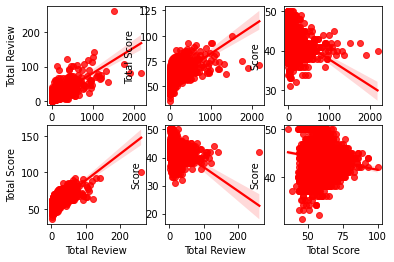

In [43]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2)
sns.regplot(x = df['Like Count'], y = df['Total Review'], color = 'r', ax=ax1)
sns.regplot(x = df['Like Count'], y = df['Total Score'], color = 'r', ax=ax2)
sns.regplot(x = df['Like Count'], y = df['Score'], color = 'r', ax=ax3)
sns.regplot(x = df['Total Review'], y = df['Total Score'], color = 'r', ax=ax4)
sns.regplot(x = df['Total Review'], y = df['Score'], color = 'r', ax=ax5)
sns.regplot(x = df['Total Score'], y = df['Score'], color = 'r', ax=ax6)


In [44]:
df['Review List'][0]


['맛보기 전까진 비싼듯 했으나, 맛을 보고 가격값 한다 생각한 곱창전골!일단 곱창이 많이 들어가있고, 신선하다. 부드럽고 쓴 맛이 나지 않는 고소한 곱창이 정말 맘에들었다. 국물 또한 진국👍🏻 구수하고 매콤한 감칠맛이 가득한 국물이다.숭덩숭던 썬 야채도 푸짐하게 들어가있는데, 눈으로 보기에도 신선하다. 질좋은 표고와 배추가 정말 맛있다.우동사리와 볶음밥은 필수다. 추가하면 세명이서 먹기도 충분하다.',
 '회식장소로 선택한 중앙해장. 곱창전골 (대)는 약 4인(혼성)이 먹기 적당한 양. 남성 4인은 (중) 2개 혹은 (대)를 주문한 후 내장탕 1개를 주문 후 내장 건더기를 곱창전골에 넣어 먹으면 적당할 듯. 매콤한 국물과 구수한 국물을 같이 맛볼 수있음. 곱창의 곱이 기대이상으로 많아 씹는 맛이 있음. 건더기를 국물과 같이 먹은 후 추가 육수 및 다대기를 추가하여 함께 제공되는 칼국수 면과 같이 먹으면 훌륭한 장칼국수. 양지수육은 제공되는 즉시 먹어도 되지만 어느정도 익은 후 먹는것이 더 맛있음. 곱창전골의 곱창의 양이 거의 9만원에 달하는 가격대비 그리 많지 않다는점, 식사 시작 후 2시간 30분안에 가게를 나서야 한다는 점을 제외하면 괜찮은 회식 장소.',
 '서울 내 유명한 곱창전골 집! 곱창 전골 뿐만아니라 해장국 내장탕 등 메뉴 모두 기본 이상은 하는곳 점심 저녁 언제나 사람들이 많으나 좌석이 많아 시간만 괜찮으면 크게 웨이팅 없이 먹을 수 있다. 곱창전골 내 곱창도 신선하고 야채와 육수의 조합도 좋다. 육수가 깔끔해서 곱창전골이라고 해도 자극적이지 않게 먹을 수 있다. 맵기는 크게 맵지 않아서 매운걸 정말 못먹는 사람 빼고는 가볍게 먹을 수 있는 정도. 의외로 볶음밥은 소소한데 볶음밥을 볶기 전에 어느정도 국물을 남겨놓고 국물에 비벼서 먹는게 좋다. 볶음밥 보다도 같이 나오는 우동사리가 더 포인트. 전골 음식 자체의 퀄리티는 뛰어나지만 그만큼 가격대도 나가기 때문에 가격과 웨이팅을 생각하면 아쉬울 수도 있지만 맛 자체는 곱창 전골을 좋아한다면 한번

In [45]:
review_total_list = []
for x in range(len(df)):
    review_total_list += df['Review List'][0]
print(len(review_total_list))
review_total_list

222570


['맛보기 전까진 비싼듯 했으나, 맛을 보고 가격값 한다 생각한 곱창전골!일단 곱창이 많이 들어가있고, 신선하다. 부드럽고 쓴 맛이 나지 않는 고소한 곱창이 정말 맘에들었다. 국물 또한 진국👍🏻 구수하고 매콤한 감칠맛이 가득한 국물이다.숭덩숭던 썬 야채도 푸짐하게 들어가있는데, 눈으로 보기에도 신선하다. 질좋은 표고와 배추가 정말 맛있다.우동사리와 볶음밥은 필수다. 추가하면 세명이서 먹기도 충분하다.',
 '회식장소로 선택한 중앙해장. 곱창전골 (대)는 약 4인(혼성)이 먹기 적당한 양. 남성 4인은 (중) 2개 혹은 (대)를 주문한 후 내장탕 1개를 주문 후 내장 건더기를 곱창전골에 넣어 먹으면 적당할 듯. 매콤한 국물과 구수한 국물을 같이 맛볼 수있음. 곱창의 곱이 기대이상으로 많아 씹는 맛이 있음. 건더기를 국물과 같이 먹은 후 추가 육수 및 다대기를 추가하여 함께 제공되는 칼국수 면과 같이 먹으면 훌륭한 장칼국수. 양지수육은 제공되는 즉시 먹어도 되지만 어느정도 익은 후 먹는것이 더 맛있음. 곱창전골의 곱창의 양이 거의 9만원에 달하는 가격대비 그리 많지 않다는점, 식사 시작 후 2시간 30분안에 가게를 나서야 한다는 점을 제외하면 괜찮은 회식 장소.',
 '서울 내 유명한 곱창전골 집! 곱창 전골 뿐만아니라 해장국 내장탕 등 메뉴 모두 기본 이상은 하는곳 점심 저녁 언제나 사람들이 많으나 좌석이 많아 시간만 괜찮으면 크게 웨이팅 없이 먹을 수 있다. 곱창전골 내 곱창도 신선하고 야채와 육수의 조합도 좋다. 육수가 깔끔해서 곱창전골이라고 해도 자극적이지 않게 먹을 수 있다. 맵기는 크게 맵지 않아서 매운걸 정말 못먹는 사람 빼고는 가볍게 먹을 수 있는 정도. 의외로 볶음밥은 소소한데 볶음밥을 볶기 전에 어느정도 국물을 남겨놓고 국물에 비벼서 먹는게 좋다. 볶음밥 보다도 같이 나오는 우동사리가 더 포인트. 전골 음식 자체의 퀄리티는 뛰어나지만 그만큼 가격대도 나가기 때문에 가격과 웨이팅을 생각하면 아쉬울 수도 있지만 맛 자체는 곱창 전골을 좋아한다면 한번

In [46]:
total_review_df = pd.DataFrame({'review':review_total_list})
total_review_df

,review
0,"맛보기 전까진 비싼듯 했으나, 맛을 보고 가격값 한다 생각한 곱창전골!일단 곱창이 ..."
1,회식장소로 선택한 중앙해장. 곱창전골 (대)는 약 4인(혼성)이 먹기 적당한 양. ...
2,서울 내 유명한 곱창전골 집! 곱창 전골 뿐만아니라 해장국 내장탕 등 메뉴 모두 기...
3,기대하지 않고 방문했는데양선지해장국엔 양이 가득가득했어요개인적으로 양을 못먹어서 그...
4,와 국물진짜진하고 얼큰하구 제대로 해장되요건더기도 엄청푸짐해서 밥없이 해장국만으로도...
...,...
222565,
222566,
222567,
222568,


In [54]:
total_review_df.to_csv('text.csv')

In [47]:
total_review_df.isnull().sum()

review    0
dtype: int64

In [48]:
text = ""
for x in range(len(total_review_df)):
    tmp = total_review_df['review'][x]
    text += str(tmp)
    text += " "

In [49]:
print(text[:1000])
print()
print(len(text))

맛보기 전까진 비싼듯 했으나, 맛을 보고 가격값 한다 생각한 곱창전골!일단 곱창이 많이 들어가있고, 신선하다. 부드럽고 쓴 맛이 나지 않는 고소한 곱창이 정말 맘에들었다. 국물 또한 진국👍🏻 구수하고 매콤한 감칠맛이 가득한 국물이다.숭덩숭던 썬 야채도 푸짐하게 들어가있는데, 눈으로 보기에도 신선하다. 질좋은 표고와 배추가 정말 맛있다.우동사리와 볶음밥은 필수다. 추가하면 세명이서 먹기도 충분하다. 회식장소로 선택한 중앙해장. 곱창전골 (대)는 약 4인(혼성)이 먹기 적당한 양. 남성 4인은 (중) 2개 혹은 (대)를 주문한 후 내장탕 1개를 주문 후 내장 건더기를 곱창전골에 넣어 먹으면 적당할 듯. 매콤한 국물과 구수한 국물을 같이 맛볼 수있음. 곱창의 곱이 기대이상으로 많아 씹는 맛이 있음. 건더기를 국물과 같이 먹은 후 추가 육수 및 다대기를 추가하여 함께 제공되는 칼국수 면과 같이 먹으면 훌륭한 장칼국수. 양지수육은 제공되는 즉시 먹어도 되지만 어느정도 익은 후 먹는것이 더 맛있음. 곱창전골의 곱창의 양이 거의 9만원에 달하는 가격대비 그리 많지 않다는점, 식사 시작 후 2시간 30분안에 가게를 나서야 한다는 점을 제외하면 괜찮은 회식 장소. 서울 내 유명한 곱창전골 집! 곱창 전골 뿐만아니라 해장국 내장탕 등 메뉴 모두 기본 이상은 하는곳 점심 저녁 언제나 사람들이 많으나 좌석이 많아 시간만 괜찮으면 크게 웨이팅 없이 먹을 수 있다. 곱창전골 내 곱창도 신선하고 야채와 육수의 조합도 좋다. 육수가 깔끔해서 곱창전골이라고 해도 자극적이지 않게 먹을 수 있다. 맵기는 크게 맵지 않아서 매운걸 정말 못먹는 사람 빼고는 가볍게 먹을 수 있는 정도. 의외로 볶음밥은 소소한데 볶음밥을 볶기 전에 어느정도 국물을 남겨놓고 국물에 비벼서 먹는게 좋다. 볶음밥 보다도 같이 나오는 우동사리가 더 포인트. 전골 음식 자체의 퀄리티는 뛰어나지만 그만큼 가격대도 나가기 때문에 가격과 웨이팅을 생각하면 아쉬울 수도 있지만 맛 자체는 곱창 전골을 좋아한다면 한번을 가볼만한 곳! 

In [50]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [51]:
hannanum.nouns(text[:100])

['전까진',
 '듯',
 '맛',
 '가격값',
 '생각',
 '곱창전골',
 '곱창',
 '신선',
 '맛',
 '고소한',
 '곱창',
 '맘에들었다',
 '국물']

In [52]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from nltk import Text
from matplotlib import font_manager, rc

matplotlib.style.use('ggplot')

font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)
plt.figure(figsize=(15,8))
kolaw = Text(okt.nouns(text), name="kolaw")
kolaw.plot(30)

plt.show()

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: GC overhead limit exceeded

<Figure size 1080x576 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
img = Image.open('computer_mask.png')
img_array = np.array(img)

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'C:/Users/user/Desktop/nanum-all (1)/나눔 글꼴/나눔고딕/NanumGothic.TTF'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path,mask = img_array)
plt.figure(figsize=(30,16))
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()